In [ ]:
# 1. Consider the hepatitis/ pima-indians-diabetes csv file, perform the following date pre-processing.
# 1. Load data in Pandas.
# 2. Drop columns that aren’t useful.
# 3. Drop rows with missing values.
# 4. Create dummy variables.
# 5. Take care of missing data.
# 6. Convert the data frame to NumPy.
# 7. Divide the data set into training data and test data.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv('hepatitis_csv.csv')
df.isnull().mean()
df = df.replace({True: 1, False: 0, 'male':1, 'female':0, 'live':1,'die':0})

In [26]:
threshold=0.3
df = df[df.columns[df.isnull().mean() < threshold]]
df=df.dropna()
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,0,1
1,50,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,0,1
2,78,0,1.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,0,1
3,31,0,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,0,1
4,34,0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,200.0,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,1.0,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,1,0
151,44,0,1.0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.9,126.0,142.0,4.3,1,1
152,61,0,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.8,75.0,20.0,4.1,1,1
153,53,1,0.0,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.5,81.0,19.0,4.1,1,1


In [45]:
array=df.values
array

array([[30. ,  1. ,  0. , ...,  4. ,  0. ,  1. ],
       [50. ,  0. ,  0. , ...,  3.5,  0. ,  1. ],
       [78. ,  0. ,  1. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  0. ,  0. , ...,  4.1,  1. ,  1. ],
       [53. ,  1. ,  0. , ...,  4.1,  1. ,  1. ],
       [43. ,  0. ,  1. , ...,  3.1,  1. ,  0. ]])

In [46]:
split_ratio = 0.7

np.random.seed(42)  
shuffled_indices = np.random.permutation(len(array))
shuffled_array = array[shuffled_indices]

split_index = int(len(shuffled_array) * split_ratio)

train_array = shuffled_array[:split_index]
test_array = shuffled_array[split_index:]
print(train_array)

[[39.   0.   0.  ...  4.   0.   1. ]
 [28.   0.   0.  ...  4.   0.   1. ]
 [39.   0.   0.  ...  4.4  0.   1. ]
 ...
 [27.   0.   0.  ...  3.   1.   1. ]
 [28.   0.   1.  ...  4.9  0.   1. ]
 [44.   0.   1.  ...  4.3  1.   1. ]]


In [ ]:
# 2. a. Construct a CSV file with the following attributes:
# Study time in hours of ML lab course (x)
# Score out of 10 (y)
# The dataset should contain 10 rows.
# b. Create a regression model and display the following:
# Coefficients: B0 (intercept) and B1 (slope)
# RMSE (Root Mean Square Error)
# Predicted responses
# c. Create a scatter plot of the data points in red color and plot the graph of x vs. predicted y in blue color.
# d. Implement the model using two methods:
# Pedhazur formula (intuitive)
# Calculus method (partial derivatives, refer to class notes)
# e. Compare the coefficients obtained using both methods and compare them with the analytical solution.
# f. Test your model to predict the score obtained when the study time of a student is 10 hours.
# Note: Do not use scikit-learn.

In [133]:
np.random.seed(42)
study_time_hours = np.arange(1, 16)
scores = np.clip(study_time_hours * np.random.uniform(0.4, 0.6) + np.random.normal(0, 1, 15), 0, 10).round()
data = {
    'study_time': study_time_hours,
    'score': scores
}

df = pd.DataFrame(data)
df

,study_time,score
0,1,0.0
1,2,1.0
2,3,2.0
3,4,3.0
4,5,2.0
5,6,2.0
6,7,3.0
7,8,3.0
8,9,2.0
9,10,6.0


In [134]:
X = df['study_time'].values
y = df['score'].values
split_ratio = 0.7
split_point = int(split_ratio * len(X))

indices = np.arange(len(X))
np.random.seed(42)  
np.random.shuffle(indices)

X_train = X[indices]
y_train = y[indices]

# X_train = X_shuffled[:split_point]
# y_train = y_shuffled[:split_point]
# X_test = X_shuffled[split_point:]
# y_test = y_shuffled[split_point:]

Intercept (B0): 0.18095238095238164
Slope (B1): 0.41071428571428564
Root Mean Squared Error (RMSE) on Test Data: 0.9129143981845715


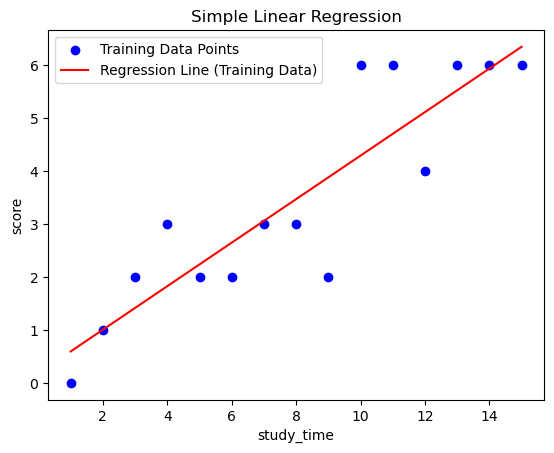

In [135]:
X_mean = np.mean(X)
y_mean = np.mean(y)

numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
beta1 = numerator / denominator
beta0 = y_mean - beta1 * X_mean

print(f"Intercept (B0): {beta0}")
print(f"Slope (B1): {beta1}")

y_pred = beta0 + beta1 * X

rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")

plt.scatter(X, y, color='blue', label='Training Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line (Training Data)')
plt.xlabel('study_time')
plt.ylabel('score')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [136]:
#calculus method
A=[[len(X_train), np.sum(X_train)],[np.sum(X_train), np.sum(X_train**2)]]
B=[[np.sum(y_train)], [np.sum(y_train*X_train)]]
print(A)
print(B)

[[15, 120], [120, 1240]]
[[52.0], [531.0]]


In [137]:
b0,b1=np.linalg.inv(A).dot(B)
print(f"Intercept (B0): {b0}")
print(f"Slope (B1): {b1}")

Intercept (B0): [0.18095238]
Slope (B1): [0.41071429]


In [138]:
#testing
ans=b1*10+b0
print(ans)

[4.28809524]


In [ ]:
# ADD1. a. Consider the hepatitis/diabetes CSV file. Create a regression model and display the following:
# Coefficients: B0 (intercept) and B1 (slope)
# RMSE (Root Mean Square Error)
# Predicted responses
# b. Create a scatter plot of the data points in red color and plot the graph of x vs. predicted y in blue color.
# c. Implement the model using two methods:
# 1. Pedhazur formula (intuitive)
# 2. Calculus method (partial derivatives, refer to class notes)
# d. Compare the coefficients obtained using both methods. For a given data point, check the predicted y
# value.
# Note: Do not use scikit-learn.

In [126]:
df=pd.read_csv('hepatitis_csv.csv')
df.isnull().mean()
df = df.replace({True: 1, False: 0, 'male':1, 'female':0, 'live':1,'die':0})
threshold=0.3
df = df[df.columns[df.isnull().mean() < threshold]]
df=df.dropna()


In [127]:
X=df['age'].values
y=df['bilirubin'].values
print(len(X))
print(len(y))

112
112


Intercept (B0): 0.852483355308322
Slope (B1): 0.010191127916226258
Root Mean Squared Error (RMSE) on Test Data: 0.8736325389795313


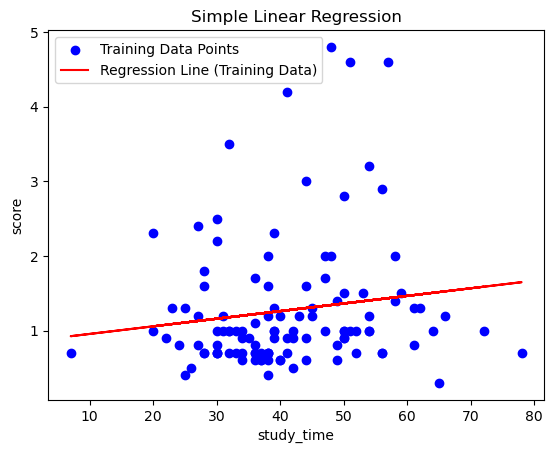

In [128]:
X_mean = np.mean(X)
y_mean = np.mean(y)

numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
beta1 = numerator / denominator
beta0 = y_mean - beta1 * X_mean

print(f"Intercept (B0): {beta0}")
print(f"Slope (B1): {beta1}")

y_pred = beta0 + beta1 * X

rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")

plt.scatter(X, y, color='blue', label='Training Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line (Training Data)')
plt.xlabel('study_time')
plt.ylabel('score')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [129]:
#calculus method
A=[[len(X), np.sum(X)],[np.sum(X), np.sum(X**2)]]
B=[[np.sum(y)], [np.sum(y*X)]]
print(A)
print(B)

[[112, 4614], [4614, 206468]]
[[142.5], [6037.5]]


In [130]:
b0,b1=np.linalg.inv(A).dot(B)
print(f"Intercept (B0): {b0}")
print(f"Slope (B1): {b1}")

Intercept (B0): [0.85248336]
Slope (B1): [0.01019113]
